### Q. Create a logistic Decision Tree on the basis of 'Age', 'Salary', 'Job', 'Performance', and 'Select' of the given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Emp.csv')

In [3]:
df

,Age,Salary,Job,Performance,Select
0,young,high,private,average,no
1,young,high,private,excellent,no
2,middle,high,private,average,yes
3,old,medium,private,average,yes
4,old,low,govt,average,yes
5,old,low,govt,excellent,no
6,middle,low,govt,excellent,yes
7,young,medium,private,average,no
8,young,low,govt,average,yes
9,old,medium,govt,average,yes


In [4]:
df.columns

Index(['Age', 'Salary', 'Job', 'Performance', 'Select'], dtype='object')

In [5]:
df['Age'].value_counts()

young     5
old       5
middle    4
Name: Age, dtype: int64

In [6]:
df.Age.replace({'young':1,'middle':2,'old':3},inplace = True)

In [7]:
df['Salary'].value_counts()

medium    6
high      4
low       4
Name: Salary, dtype: int64

In [8]:
df.Salary.replace({'low':1,'medium':2,'high':3},inplace = True)

In [9]:
df['Job'].value_counts()

private    7
govt       7
Name: Job, dtype: int64

In [10]:
df['Job'] = df.Salary.replace({'private':1,'govt':2})

In [11]:
df['Performance'].value_counts()

average      8
excellent    6
Name: Performance, dtype: int64

In [12]:
df['Performance'] = df.Performance.replace({'average':1,'excellent':2})

In [13]:
df

,Age,Salary,Job,Performance,Select
0,1,3,3,1,no
1,1,3,3,2,no
2,2,3,3,1,yes
3,3,2,2,1,yes
4,3,1,1,1,yes
5,3,1,1,2,no
6,2,1,1,2,yes
7,1,2,2,1,no
8,1,1,1,1,yes
9,3,2,2,1,yes


In [14]:
df.dtypes

Age             int64
Salary          int64
Job             int64
Performance     int64
Select         object
dtype: object

In [15]:
df.shape

(14, 5)

In [16]:
df.head()

,Age,Salary,Job,Performance,Select
0,1,3,3,1,no
1,1,3,3,2,no
2,2,3,3,1,yes
3,3,2,2,1,yes
4,3,1,1,1,yes


In [17]:
df.tail()

,Age,Salary,Job,Performance,Select
9,3,2,2,1,yes
10,1,2,2,2,yes
11,2,2,2,2,yes
12,2,3,3,1,yes
13,3,2,2,2,no


In [18]:
df.describe()

,Age,Salary,Job,Performance
count,14.000000,14.000000,14.000000,14.000000
mean,2.000000,2.000000,2.000000,1.428571
std,0.877058,0.784465,0.784465,0.513553
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.250000,1.250000,1.000000
50%,2.000000,2.000000,2.000000,1.000000
75%,3.000000,2.750000,2.750000,2.000000
max,3.000000,3.000000,3.000000,2.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          14 non-null     int64 
 1   Salary       14 non-null     int64 
 2   Job          14 non-null     int64 
 3   Performance  14 non-null     int64 
 4   Select       14 non-null     object
dtypes: int64(4), object(1)
memory usage: 688.0+ bytes


In [20]:
x = df[['Age','Salary','Job','Performance']].values

In [21]:
x

array([[1, 3, 3, 1],
       [1, 3, 3, 2],
       [2, 3, 3, 1],
       [3, 2, 2, 1],
       [3, 1, 1, 1],
       [3, 1, 1, 2],
       [2, 1, 1, 2],
       [1, 2, 2, 1],
       [1, 1, 1, 1],
       [3, 2, 2, 1],
       [1, 2, 2, 2],
       [2, 2, 2, 2],
       [2, 3, 3, 1],
       [3, 2, 2, 2]], dtype=int64)

In [22]:
y = df['Select']

In [23]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Select, dtype: object

In [24]:
y.value_counts()

yes    9
no     5
Name: Select, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size = 0.3)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
model = DecisionTreeClassifier()

In [29]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
y_predict = model.predict(x_test)

In [31]:
y_predict

array(['no', 'yes', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes'],
      dtype=object)

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,y_predict)*100

33.33333333333333

In [34]:
d1 = pd.DataFrame({'actual':y_test,'predicted':y_predict})

In [35]:
d1

,actual,predicted
4,yes,no
6,yes,yes
8,yes,no
2,yes,yes
1,no,yes
9,yes,no
3,yes,no
0,no,yes
11,yes,yes


In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
performance = confusion_matrix(y_test,y_predict)

In [38]:
performance

array([[0, 2],
       [4, 3]], dtype=int64)

In [39]:
from sklearn.metrics import plot_confusion_matrix

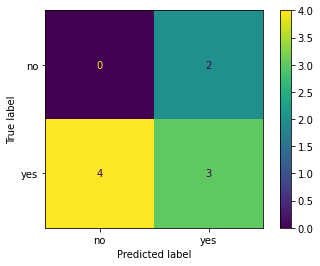

In [40]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [41]:
cross = pd.crosstab(d1['actual'],d1['predicted'],rownames = ['Actual'],colnames = ['Predicted'])
cross

Predicted,no,yes
Actual,,
no,0,2
yes,4,3


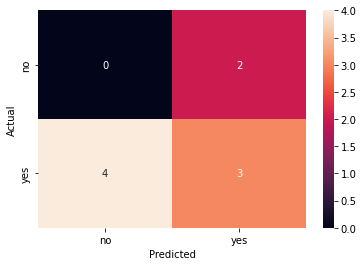

In [42]:
sns.heatmap(cross,annot = True)
plt.show()

In [43]:
from sklearn import tree

In [44]:
feature_name = ['Age','Salary','Job','Performance']

In [45]:
feature_name

['Age', 'Salary', 'Job', 'Performance']

In [46]:
class_name = ['Yes','No']

In [47]:
class_name

['Yes', 'No']

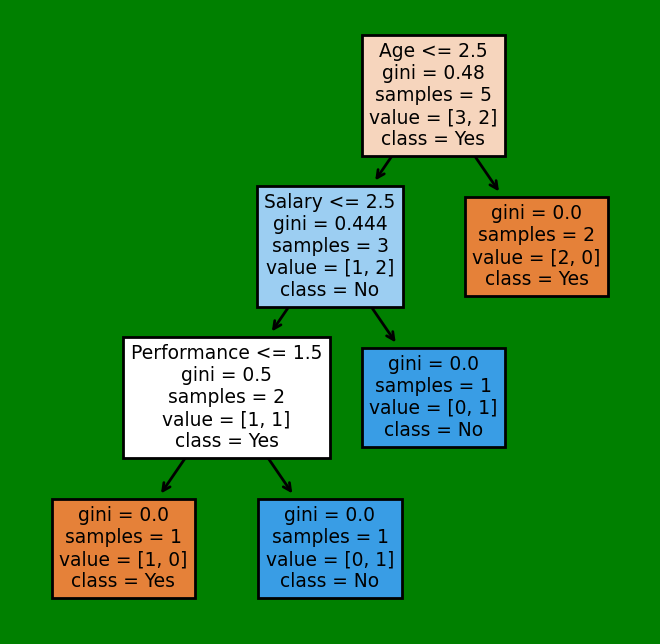

In [48]:
fig,ax= plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=200, facecolor='g')
tree.plot_tree(model,feature_names=feature_name, class_names=class_name, filled=True)
plt.show()